<a href="https://colab.research.google.com/github/Yamito548/Examen-BIU/blob/main/Examen_pr%C3%A1ctico_BIU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por Dylan Jesús Ramírez Bermúdez

# Librerías

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejecutamos pig

In [177]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [178]:
# !wget http://apache.osuosl.org/pig/pig-0.17.0/pig-0.17.0.tar.gz
# !tar -xvf pig-0.17.0.tar.gz
# !ls

In [179]:
#Vemos la versión de pig
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['PIG_HOME'] = '/content/pig-0.17.0'
os.environ['PATH'] = '%s/bin:%s' % (os.environ['PIG_HOME'], os.environ['PATH'])

!pig -version

Apache Pig version 0.17.0 (r1797386) 
compiled Jun 02 2017, 15:41:58


# 1. Lectura y Análisis de Datos Meteorológicos:

In [180]:
%%writefile primero.pig
-- Cargar datos desde un archivo CSV
weather_data = LOAD '/content/weather.csv' USING PigStorage(',') AS (
date:chararray,
temperature:int,
pressure:int,
humidity:int
);
-- Visualización básica del contenido
DUMP weather_data;
DEFINE shared_data 'weather_data';

Overwriting primero.pig


In [181]:
#Ejecutamos el código anterior
!pig -x local -f primero.pig

2024-01-16 18:17:33,097 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(41)) - Trying ExecType : LOCAL
2024-01-16 18:17:33,100 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(43)) - Picked LOCAL as the ExecType
2024-01-16 18:17:33,174 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2024-01-16 18:17:33,174 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1705429053157.log
2024-01-16 18:17:33,195 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - user.name is deprecated. Instead, use mapreduce.job.user.name
2024-01-16 18:17:33,626 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2024-01-16 18:17:33,783 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2024-01-16 18:17:33,785 [main] INFO  org.apache.pig.backend.hadoop

#2. Manejo de Valores Erróneos o Faltantes en los Datos:


In [182]:
%%writefile segundo.pig
-- Cargar datos desde un archivo CSV
weather_data = LOAD '/content/weather.csv' USING PigStorage(',') AS (
date:chararray,
temperature:int,
pressure:int,
humidity:int
);
-- Filtrar registros con datos faltantes o erróneos
clean_weather_data = FILTER weather_data BY temperature IS NOT NULL AND pressure
IS NOT NULL AND humidity IS NOT NULL;
-- Opcionalmente, filtrar valores que no son realistas
valid_weather_data = FILTER clean_weather_data BY temperature > -50 AND
temperature < 50; -- Ejemplo de rango de temperatura válido
DUMP clean_weather_data;


Overwriting segundo.pig


In [183]:
#Ejecutamos el código anterior
!pig -x local -f segundo.pig

2024-01-16 18:17:36,920 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(41)) - Trying ExecType : LOCAL
2024-01-16 18:17:36,923 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(43)) - Picked LOCAL as the ExecType
2024-01-16 18:17:36,976 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2024-01-16 18:17:36,976 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1705429056967.log
2024-01-16 18:17:36,992 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - user.name is deprecated. Instead, use mapreduce.job.user.name
2024-01-16 18:17:37,438 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2024-01-16 18:17:37,587 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2024-01-16 18:17:37,589 [main] INFO  org.apache.pig.backend.hadoop

# 3. Cálculo de la Temperatura Media con Manejo de Datos Faltantes:


In [184]:
%%writefile tercero.pig
-- Cargar datos desde un archivo CSV
weather_data = LOAD '/content/weather.csv' USING PigStorage(',') AS (
date:chararray,
temperature:int,
pressure:int,
humidity:int
);
-- Filtrar registros con datos faltantes o erróneos
clean_weather_data = FILTER weather_data BY temperature IS NOT NULL AND pressure
IS NOT NULL AND humidity IS NOT NULL;

-- Opcionalmente, filtrar valores que no son realistas
valid_weather_data = FILTER clean_weather_data BY temperature > -50 AND
temperature < 50;

-- Calcular la temperatura media excluyendo registros incompletos
grouped_data = GROUP valid_weather_data ALL;
average_temperature = FOREACH grouped_data GENERATE
AVG(valid_weather_data.temperature) AS avg_temp;
DUMP average_temperature;


Overwriting tercero.pig


In [185]:
!pig -x local -f tercero.pig

2024-01-16 18:17:40,782 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(41)) - Trying ExecType : LOCAL
2024-01-16 18:17:40,785 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(43)) - Picked LOCAL as the ExecType
2024-01-16 18:17:40,835 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2024-01-16 18:17:40,835 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1705429060827.log
2024-01-16 18:17:40,849 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - user.name is deprecated. Instead, use mapreduce.job.user.name
2024-01-16 18:17:41,280 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2024-01-16 18:17:41,476 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2024-01-16 18:17:41,479 [main] INFO  org.apache.pig.backend.hadoop

# 4. Transformaciones Avanzadas y Unión de Datos:


In [186]:
%%writefile cuarto.pig
-- Cargar datos desde un archivo CSV
weather_data = LOAD '/content/weather.csv' USING PigStorage(',') AS (
date:chararray,
temperature:int,
pressure:int,
humidity:int
);

-- Filtrar registros con datos faltantes o erróneos
clean_weather_data = FILTER weather_data BY temperature IS NOT NULL AND pressure
IS NOT NULL AND humidity IS NOT NULL;

-- Filtrar valores que no son realistas
valid_weather_data = FILTER clean_weather_data BY temperature > -50 AND
temperature < 50;

-- Cargar otra fuente de datos, por ejemplo, datos de ubicación
location_data = LOAD '/content/location.csv' USING PigStorage(',') AS (
date:chararray,
location:chararray
);
-- Unir datos meteorológicos con datos de ubicación
joined_data = JOIN valid_weather_data BY date, location_data BY date;
-- Aplicar transformaciones o filtros adicionales según sea necesario
-- Por ejemplo, seleccionar sólo los datos de una ubicación específica
filtered_data = FILTER joined_data BY location == 'Las Palmas';
DUMP filtered_data;

-- Guardar los resultados en un archivo
STORE filtered_data INTO 'output2' USING PigStorage(',');

Overwriting cuarto.pig


In [187]:
!pig -x local -f cuarto.pig

2024-01-16 18:17:46,758 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(41)) - Trying ExecType : LOCAL
2024-01-16 18:17:46,764 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(43)) - Picked LOCAL as the ExecType
2024-01-16 18:17:46,828 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2024-01-16 18:17:46,828 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1705429066819.log
2024-01-16 18:17:46,843 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - user.name is deprecated. Instead, use mapreduce.job.user.name
2024-01-16 18:17:47,268 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2024-01-16 18:17:47,414 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2024-01-16 18:17:47,416 [main] INFO  org.apache.pig.backend.hadoop

In [188]:
!mv /content/output2/part-r-00000 /content/output.csv

mv: cannot stat '/content/output2/part-r-00000': No such file or directory


# 5. Exportación de Datos para Visualización:


In [189]:
# %%writefile quinto.pig
# -- Aplicar transformaciones o filtros adicionales según sea necesario
# -- Por ejemplo, seleccionar sólo los datos de una ubicación específica
# filtered_data = FILTER joined_data BY location == 'Las Palmas

# -- Guardar los resultados en un archivo
# STORE filtered_data INTO '/path/to/output' USING PigStorage(',');

# -- movemos el archivo de salida y lo cambiamos de nombre
# !mv /content/output2/part-r-00000 /content/output.csv

In [190]:
!pig -x local -f quinto.pig

2024-01-16 18:17:51,380 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(41)) - Trying ExecType : LOCAL
2024-01-16 18:17:51,382 INFO  [main] pig.ExecTypeProvider (ExecTypeProvider.java:selectExecType(43)) - Picked LOCAL as the ExecType
2024-01-16 18:17:51,430 [main] INFO  org.apache.pig.Main - Apache Pig version 0.17.0 (r1797386) compiled Jun 02 2017, 15:41:58
2024-01-16 18:17:51,432 [main] INFO  org.apache.pig.Main - Logging error messages to: /content/pig_1705429071422.log
2024-01-16 18:17:51,452 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - user.name is deprecated. Instead, use mapreduce.job.user.name
2024-01-16 18:17:51,896 [main] INFO  org.apache.pig.impl.util.Utils - Default bootup file /root/.pigbootup not found
2024-01-16 18:17:52,034 [main] INFO  org.apache.hadoop.conf.Configuration.deprecation - mapred.job.tracker is deprecated. Instead, use mapreduce.jobtracker.address
2024-01-16 18:17:52,036 [main] INFO  org.apache.pig.backend.hadoop

# Vemos los datos

In [191]:
#Cargamos los datos y seleccionamos las dos primeras columnas
data = pd.read_csv('/content/output.csv', header=None, usecols=[0, 1])

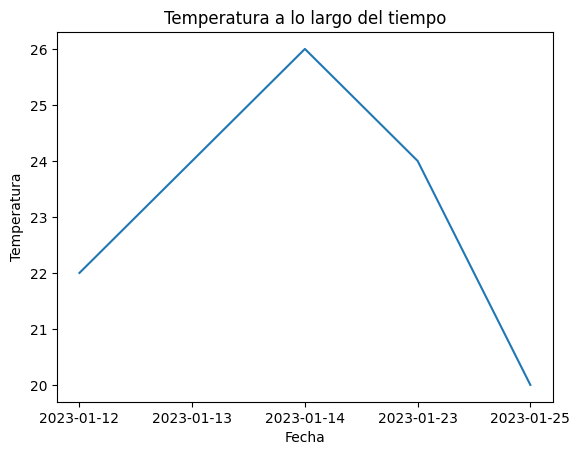

In [192]:
#Asiganmos nombres a estas columnas
data.columns = ['date','temperature']
#Visualizar los datos temporales
plt.plot(data['date'], data['temperature'])
plt.title('Temperatura a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.show()